# Venture Funding with Deep Learning

You work as a risk management associate at Alphabet Soup, a venture capital firm. Alphabet Soup’s business team receives many funding applications from startups every day. This team has asked you to help them create a model that predicts whether applicants will be successful if funded by Alphabet Soup.

The business team has given you a CSV containing more than 34,000 organizations that have received funding from Alphabet Soup over the years. With your knowledge of machine learning and neural networks, you decide to use the features in the provided dataset to create a binary classifier model that will predict whether an applicant will become a successful business. The CSV file contains a variety of information about these businesses, including whether or not they ultimately became successful.

## Instructions:

The steps for this challenge are broken out into the following sections:

* Prepare the data for use on a neural network model.

* Compile and evaluate a binary classification model using a neural network.

* Optimize the neural network model.

### Prepare the Data for Use on a Neural Network Model 

Using your knowledge of Pandas and scikit-learn’s `StandardScaler()`, preprocess the dataset so that you can use it to compile and evaluate the neural network model later.

Open the starter code file, and complete the following data preparation steps:

1. Read the `applicants_data.csv` file into a Pandas DataFrame. Review the DataFrame, looking for categorical variables that will need to be encoded, as well as columns that could eventually define your features and target variables.   

2. Drop the “EIN” (Employer Identification Number) and “NAME” columns from the DataFrame, because they are not relevant to the binary classification model.
 
3. Encode the dataset’s categorical variables using `OneHotEncoder`, and then place the encoded variables into a new DataFrame.

4. Add the original DataFrame’s numerical variables to the DataFrame containing the encoded variables.

> **Note** To complete this step, you will employ the Pandas `concat()` function that was introduced earlier in this course. 

5. Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “IS_SUCCESSFUL”. The remaining columns should define the features dataset. 

6. Split the features and target sets into training and testing datasets.

7. Use scikit-learn's `StandardScaler` to scale the features data.

### Compile and Evaluate a Binary Classification Model Using a Neural Network

Use your knowledge of TensorFlow to design a binary classification deep neural network model. This model should use the dataset’s features to predict whether an Alphabet Soup&ndash;funded startup will be successful based on the features in the dataset. Consider the number of inputs before determining the number of layers that your model will contain or the number of neurons on each layer. Then, compile and fit your model. Finally, evaluate your binary classification model to calculate the model’s loss and accuracy. 
 
To do so, complete the following steps:

1. Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.

2. Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.

> **Hint** When fitting the model, start with a small number of epochs, such as 20, 50, or 100.

3. Evaluate the model using the test data to determine the model’s loss and accuracy.

4. Save and export your model to an HDF5 file, and name the file `AlphabetSoup.h5`. 

### Optimize the Neural Network Model

Using your knowledge of TensorFlow and Keras, optimize your model to improve the model's accuracy. Even if you do not successfully achieve a better accuracy, you'll need to demonstrate at least two attempts to optimize the model. You can include these attempts in your existing notebook. Or, you can make copies of the starter notebook in the same folder, rename them, and code each model optimization in a new notebook. 

> **Note** You will not lose points if your model does not achieve a high accuracy, as long as you make at least two attempts to optimize the model.

To do so, complete the following steps:

1. Define at least three new deep neural network models (the original plus 2 optimization attempts). With each, try to improve on your first model’s predictive accuracy.

> **Rewind** Recall that perfect accuracy has a value of 1, so accuracy improves as its value moves closer to 1. To optimize your model for a predictive accuracy as close to 1 as possible, you can use any or all of the following techniques:
>
> * Adjust the input data by dropping different features columns to ensure that no variables or outliers confuse the model.
>
> * Add more neurons (nodes) to a hidden layer.
>
> * Add more hidden layers.
>
> * Use different activation functions for the hidden layers.
>
> * Add to or reduce the number of epochs in the training regimen.

2. After finishing your models, display the accuracy scores achieved by each model, and compare the results.

3. Save each of your models as an HDF5 file.


In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# Imports
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

---

## Prepare the data to be used on a neural network model

### Step 1: Read the `applicants_data.csv` file into a Pandas DataFrame. Review the DataFrame, looking for categorical variables that will need to be encoded, as well as columns that could eventually define your features and target variables.  


In [5]:
# Upload credit_card_transactions.csv to Colab
from google.colab import files

csv_file = files.upload()

Saving applicants_data.csv to applicants_data (2).csv


In [6]:
# Read the applicants_data.csv file from the Resources folder into a Pandas DataFrame
applicant_data_df = pd.read_csv('applicants_data.csv')

# Review the DataFrame
applicant_data_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [7]:
# Review the data types associated with the columns
applicant_data_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

### Step 2: Drop the “EIN” (Employer Identification Number) and “NAME” columns from the DataFrame, because they are not relevant to the binary classification model.

In [8]:
# Drop the 'EIN' and 'NAME' columns from the DataFrame
applicant_data_df = applicant_data_df.drop(columns=['EIN','NAME'])

# Review the DataFrame
applicant_data_df.head()


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [9]:
# Additional data exploration
print('STATUS:')
display(applicant_data_df['STATUS'].value_counts())

print('SPECIAL_CONSIDERATIONS:')
display(applicant_data_df['SPECIAL_CONSIDERATIONS'].value_counts())


STATUS:


1    34294
0        5
Name: STATUS, dtype: int64

SPECIAL_CONSIDERATIONS:


N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

### Step 3: Encode the dataset’s categorical variables using `OneHotEncoder`, and then place the encoded variables into a new DataFrame.

In [10]:
# Create a list of categorical variables 
# Since status is already an integer, it is not included for one hot encoding
categorical_variables = ['APPLICATION_TYPE','AFFILIATION','CLASSIFICATION','USE_CASE', 'ORGANIZATION', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS']

# Display the categorical variables list
display(categorical_variables)

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [11]:
# Create a OneHotEncoder instance
# drop if_binary is specified for SPECIAL_CONSIDERATIONS.  This only has 2 values, 
# if one was not dropped, this signal would be double counted.
enc = OneHotEncoder(sparse=False,drop='if_binary')


In [12]:
# Encode the categorcal variables using OneHotEncoder
encoded_data = enc.fit_transform(applicant_data_df[categorical_variables])

# Preview encoded data
display(encoded_data[0:5])

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.,

In [13]:
# Create a DataFrame with the encoded variables
encoded_df = pd.DataFrame(
    encoded_data,
    columns = enc.get_feature_names(categorical_variables)
)
# Review the DataFrame
encoded_df.head()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Step 4: Add the original DataFrame’s numerical variables to the DataFrame containing the encoded variables.

> **Note** To complete this step, you will employ the Pandas `concat()` function that was introduced earlier in this course. 

In [14]:
# Add the numerical variables from the original DataFrame to the one-hot encoding DataFrame
encoded_df = pd.concat([applicant_data_df[['STATUS','ASK_AMT']],encoded_df],axis=1)

# Review the Dataframe
encoded_df.head()

,STATUS,ASK_AMT,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,...,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,108590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,6692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,142590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Step 5: Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “IS_SUCCESSFUL”. The remaining columns should define the features dataset. 



In [15]:
# Define the target set y using the IS_SUCCESSFUL column
y = applicant_data_df['IS_SUCCESSFUL']

# Display a sample of y
y.head()


0    1
1    1
2    0
3    1
4    1
Name: IS_SUCCESSFUL, dtype: int64

In [16]:
# Define features set X by selecting all columns but IS_SUCCESSFUL
X = encoded_df

# Review the features DataFrame
X.head()


,STATUS,ASK_AMT,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,...,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,108590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,6692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,142590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Step 6: Split the features and target sets into training and testing datasets.


In [17]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)


### Step 7: Use scikit-learn's `StandardScaler` to scale the features data.

In [18]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


---

## Compile and Evaluate a Binary Classification Model Using a Neural Network

### Step 1: Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.


In [19]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])

# Review the number of features 
number_input_features


115

In [20]:
# Define the number of neurons in the output layer
number_output_neurons = 1

In [21]:
# Define the number of hidden nodes for the first hidden layer
# per 13.2.3 - first approximation (number of input features + number of neurons in output layer) / 2
hidden_nodes_layer1 =  58 # (115+1)/2

# Review the number hidden nodes in the first layer
hidden_nodes_layer1


58

In [22]:
# Define the number of hidden nodes for the second hidden layer
# per 13.2.3 - approximately (number of neurons in the prior hidden layer + number of neurons in output layer) / 2)
hidden_nodes_layer2 =  30  # (58+1)/2

# Review the number hidden nodes in the second layer
hidden_nodes_layer2


30

In [23]:
# Create the Sequential model instance
nn = Sequential()


In [24]:
# Add the first hidden layer
nn.add(Dense(units=hidden_nodes_layer1,input_dim=number_input_features,activation='relu'))

In [25]:
# Add the second hidden layer
nn.add(Dense(units=hidden_nodes_layer2,activation='relu'))

In [26]:
# Add the output layer to the model specifying the number of output neurons and activation function
nn.add(Dense(units=1,activation='sigmoid'))

In [27]:
# Display the Sequential model summary
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 58)                6728      
                                                                 
 dense_1 (Dense)             (None, 30)                1770      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 8,529
Trainable params: 8,529
Non-trainable params: 0
_________________________________________________________________


### Step 2: Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.


In [28]:
# Compile the Sequential model
# loss is binary_crossentropy sicne model is binary classification
nn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [29]:
# Fit the model using 50 epochs and the training data
nn.fit(X_train_scaled,y_train,epochs=50)


Epoch 1/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5748 - accuracy: 0.7191
Epoch 2/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5528 - accuracy: 0.7288
Epoch 3/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5495 - accuracy: 0.7303
Epoch 4/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5477 - accuracy: 0.7330
Epoch 5/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5460 - accuracy: 0.7299
Epoch 6/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5449 - accuracy: 0.7343
Epoch 7/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5442 - accuracy: 0.7346
Epoch 8/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5433 - accuracy: 0.7357
Epoch 9/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5421 - accuracy: 0.7359
Epoch 10/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5416 - accuracy: 0.7364

### Step 3: Evaluate the model using the test data to determine the model’s loss and accuracy.


In [30]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5553 - accuracy: 0.7291 - 436ms/epoch - 2ms/step
Loss: 0.5553061366081238, Accuracy: 0.7290962338447571


### Step 4: Save and export your model to an HDF5 file, and name the file `AlphabetSoup.h5`. 


In [31]:
# Set the model's file path
file_path = 'AlphabetSoup.h5'

# Export your model to a HDF5 file
nn.save(file_path)


---

## Optimize the neural network model


### Step 1: Define at least three new deep neural network models (resulting in the original plus 3 optimization attempts). With each, try to improve on your first model’s predictive accuracy.

> **Rewind** Recall that perfect accuracy has a value of 1, so accuracy improves as its value moves closer to 1. To optimize your model for a predictive accuracy as close to 1 as possible, you can use any or all of the following techniques:
>
> * Adjust the input data by dropping different features columns to ensure that no variables or outliers confuse the model.
>
> * Add more neurons (nodes) to a hidden layer.
>
> * Add more hidden layers.
>
> * Use different activation functions for the hidden layers.
>
> * Add to or reduce the number of epochs in the training regimen.


### Alternative Model 1

Explore whether increasing the size of the hidder layers improved model effeciency.


In [32]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])

# Review the number of features
number_input_features

115

In [33]:
# Define the number of neurons in the output layer
number_output_neurons_A1 = 1

In [34]:
# Define the number of hidden nodes for the first hidden layer
# following instructor's recommendation, 
# hidden layer 1 should have 2 * input rounded up to next power of 2
# 115 * 2 rounded up to 256
hidden_nodes_layer1_A1 = 256

# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A1

256

In [35]:
# Define the number of hidden nodes for the second hidden layer
# following guideline in 13.2.3, node count should rougly be 
# (# of nodes in prior layer + # of output nodes)/2
# roughly 128
hidden_nodes_layer2_A1 = 128

# Review the number of hidden nodes in the second layer
hidden_nodes_layer2_A1

128

In [36]:
# Create the Sequential model instance
nn_A1 = Sequential()

In [37]:
# First hidden layer
nn_A1.add(Dense(units=hidden_nodes_layer1_A1,input_dim=number_input_features,activation='relu'))

# Second hidden layer
nn_A1.add(Dense(units=hidden_nodes_layer2_A1,activation='relu'))

# Output layer
nn_A1.add(Dense(units=number_output_neurons_A1,activation='sigmoid'))

# Check the structure of the model
nn_A1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               29696     
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 62,721
Trainable params: 62,721
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Compile the Sequential model
nn_A1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [39]:
# Fit the model using 50 epochs and the training data
fit_model_A1 = nn_A1.fit(X_train_scaled,y_train,epochs=50)


Epoch 1/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5742 - accuracy: 0.7226
Epoch 2/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5533 - accuracy: 0.7297
Epoch 3/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5497 - accuracy: 0.7319
Epoch 4/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5473 - accuracy: 0.7333
Epoch 5/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5464 - accuracy: 0.7316
Epoch 6/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5450 - accuracy: 0.7339
Epoch 7/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5433 - accuracy: 0.7346
Epoch 8/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5429 - accuracy: 0.7346
Epoch 9/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5416 - accuracy: 0.7360
Epoch 10/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5413 - accuracy: 0.7357

#### Alternative Model 2

Explore whether adding a hidden layer improves model effeciency.

In [40]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])

# Review the number of features
number_input_features

115

In [41]:
# Define the number of neurons in the output layer
number_output_neurons_A2 = 1

In [42]:
# Define the number of hidden nodes in each layer
hidden_nodes_layer1_A2 = 256
hidden_nodes_layer2_A2 = 128
hidden_nodes_layer3_A2 = 64
hidden_nodes_layer4_A2 = 32
hidden_nodes_layer5_A2 = 16


In [43]:
# Create the Sequential model instance
nn_A2 = Sequential()

In [44]:
# Add the hidden layers
nn_A2.add(Dense(units=hidden_nodes_layer1_A2,input_dim=number_input_features,activation='relu'))
nn_A2.add(Dense(units=hidden_nodes_layer2_A2,activation='relu'))
nn_A2.add(Dense(units=hidden_nodes_layer3_A2,activation='relu'))
nn_A2.add(Dense(units=hidden_nodes_layer4_A2,activation='relu'))
nn_A2.add(Dense(units=hidden_nodes_layer5_A2,activation='relu'))

# Add the Output layer
nn_A2.add(Dense(units=number_output_neurons_A2,activation='sigmoid'))

# Check the structure of the model
nn_A2.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               29696     
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 73,473
Trainable params: 73,473
Non-trai

In [45]:
# Compile the model
nn_A2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [46]:
# Fit the model
fit_model_A2 = nn_A2.fit(X_train_scaled,y_train,epochs=50)


Epoch 1/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5672 - accuracy: 0.7241
Epoch 2/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5536 - accuracy: 0.7302
Epoch 3/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5499 - accuracy: 0.7330
Epoch 4/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5478 - accuracy: 0.7326
Epoch 5/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5472 - accuracy: 0.7325
Epoch 6/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5459 - accuracy: 0.7335
Epoch 7/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5449 - accuracy: 0.7346
Epoch 8/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5438 - accuracy: 0.7345
Epoch 9/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5429 - accuracy: 0.7352
Epoch 10/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5421 - accuracy: 0.7357

### Before Selecting Third Alternative Review convergence of both Alternative Models
This can assess whether increasing epochs would improve model performance.

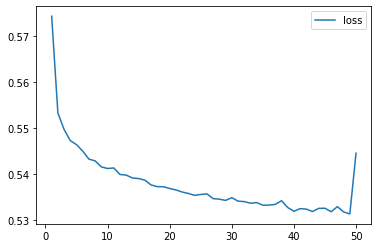

In [47]:
# Create a DataFrame with the history dictionary
df_A1 = pd.DataFrame(fit_model_A1.history, index=range(1, len(fit_model_A1.history["loss"]) + 1))

# Plot the loss
ax = df_A1.plot(y="loss")


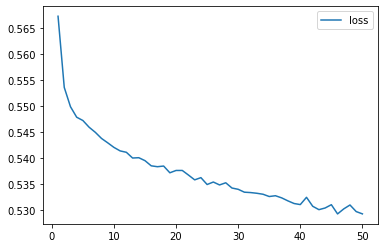

In [48]:
# Create a DataFrame with the history dictionary
df_A2 = pd.DataFrame(fit_model_A2.history, index=range(1, len(fit_model_A2.history["loss"]) + 1))

# Plot the loss
df_A2.plot(y="loss")


#### Review of Loss plots
The above plots suggest that increasing the epochs may improve the performance of the model


### Before Selecting Third Alternative Review training dataset
Explore whether adjustments to the dataset might improve model performance.

In [49]:
# check for class imbalance
y_train.value_counts()

1    13723
0    12001
Name: IS_SUCCESSFUL, dtype: int64

#### Imbalance Review

No significant class imbalance

#### Alternative Model 3

Explore whether increasing epoch, applying PCA improve model efficency and adjusting loss and activation functions can improve the performance of the model.

* For the hidden layer activation function, instead of **relu**, try **elu**
* For the output layer activation function, instead of **sigmoid**, try **tanh**
* Instead of **binary_crossentropy**, try **mse**

In [431]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train_scaled[1])

# Review the number of features
number_input_features

115

In [449]:
# Define the number of hidden nodes in each layer
hidden_nodes_layer1_A3 = 64
hidden_nodes_layer2_A3 = 16
hidden_nodes_layer3_A3 = 13


# Define the number of neurons in the output layer
number_output_neurons_A3 = 1

# Define the number of epoches to train with
epochs_A3=200

# define hidden layer activation function to use
hidden_layer_activation = 'elu'

# define output layer activation function to use
output_layer_activation = 'tanh'  

# define compilation loss function
compile_loss = 'mse' 

In [450]:
# Create the Sequential model instance
nn_A3 = Sequential()

In [451]:
# Add the hidden layers
nn_A3.add(Dense(units=hidden_nodes_layer1_A3,input_dim=number_input_features,activation=hidden_layer_activation))
nn_A3.add(Dense(units=hidden_nodes_layer2_A3,activation=hidden_layer_activation))
nn_A3.add(Dense(units=hidden_nodes_layer3_A3,activation=hidden_layer_activation))

# Add the Output layer
nn_A3.add(Dense(units=number_output_neurons_A3,activation=output_layer_activation))

# Check the structure of the model
nn_A3.summary()

Model: "sequential_76"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_309 (Dense)           (None, 64)                7424      
                                                                 
 dense_310 (Dense)           (None, 16)                1040      
                                                                 
 dense_311 (Dense)           (None, 13)                221       
                                                                 
 dense_312 (Dense)           (None, 1)                 14        
                                                                 
Total params: 8,699
Trainable params: 8,699
Non-trainable params: 0
_________________________________________________________________


In [452]:
# Compile the model
nn_A3.compile(loss=compile_loss,optimizer='adam',metrics=['accuracy'])

In [453]:
# Fit the model
fit_model_A3 = nn_A3.fit(X_train_scaled,y_train,epochs=epochs_A3)

Epoch 1/200
804/804 [==============================] - 2s 2ms/step - loss: 0.2080 - accuracy: 0.7168
Epoch 2/200
804/804 [==============================] - 2s 2ms/step - loss: 0.1897 - accuracy: 0.7262
Epoch 3/200
804/804 [==============================] - 1s 2ms/step - loss: 0.1876 - accuracy: 0.7282
Epoch 4/200
804/804 [==============================] - 1s 2ms/step - loss: 0.1867 - accuracy: 0.7296
Epoch 5/200
804/804 [==============================] - 2s 2ms/step - loss: 0.1860 - accuracy: 0.7294
Epoch 6/200
804/804 [==============================] - 1s 2ms/step - loss: 0.1855 - accuracy: 0.7297
Epoch 7/200
804/804 [==============================] - 1s 2ms/step - loss: 0.1852 - accuracy: 0.7316
Epoch 8/200
804/804 [==============================] - 2s 2ms/step - loss: 0.1850 - accuracy: 0.7313
Epoch 9/200
804/804 [==============================] - 1s 2ms/step - loss: 0.1846 - accuracy: 0.7325
Epoch 10/200
804/804 [==============================] - 1s 2ms/step - loss: 0.1841 - accura

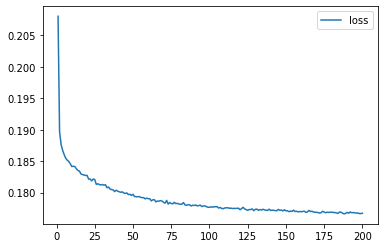

In [454]:
# See if increasing epochs allowed the model to converge
# Create a DataFrame with the history dictionary
df_A3 = pd.DataFrame(fit_model_A3.history, index=range(1, len(fit_model_A3.history["loss"]) + 1))

# Plot the loss
df_A3.plot(y="loss")

### Step 2: After finishing your models, display the accuracy scores achieved by each model, and compare the results.

In [455]:
print("Original Model Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Original Model Results
268/268 - 0s - loss: 0.5553 - accuracy: 0.7291 - 334ms/epoch - 1ms/step
Loss: 0.5553061366081238, Accuracy: 0.7290962338447571


In [456]:
print("Alternative Model 1 Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A1.evaluate(X_test_scaled, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 1 Results
268/268 - 0s - loss: 0.6797 - accuracy: 0.7321 - 346ms/epoch - 1ms/step
Loss: 0.679736852645874, Accuracy: 0.7321282625198364


In [457]:
print("Alternative Model 2 Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A2.evaluate(X_test_scaled, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 2 Results
268/268 - 0s - loss: 0.5703 - accuracy: 0.7300 - 360ms/epoch - 1ms/step
Loss: 0.5702768564224243, Accuracy: 0.7300291657447815


In [458]:
print("Alternative Model 3 Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A3.evaluate(X_test_scaled, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 3 Results
268/268 - 0s - loss: 0.1868 - accuracy: 0.7245 - 428ms/epoch - 2ms/step
Loss: 0.18680702149868011, Accuracy: 0.7245481014251709


#### Summary

Several approached were explored to create a model that could effectively predict successful prospects for funding.  

The first alternative model attempted to improve model performance by increasing the number of nodes in the hidden layers.  Increasing the size of the hidden layers did not appreciably improve the performance of the model.

The second alternative model attempted to improve model performance by increasing the number of hidden layers.  Adding additional hidden layers also did not appreciably improve the performance of the model.

It was noticed that 50 epochs might not have been sufficient to allow the first two alternative models to converge.  In third alternative model, a higher number of epochs was used.  In addition, an alternative set of activation functions and loss functions were used.  Despite these changes, the performance of the third model was also not appreciably better than the original model.  In fact, the precision was slightly lower than the original model. 

| Model | Layers | Trainable Nodes | Loss | Accuracy |
|-------|--------|-----------------|---------|--------|
| original | 3 | 8,529 | 0.5553 | 0.7291 |
| alt 1 | 3 | 62,721 | 0.6797 | 0.7321 |
| alt 2 | 6 | 73,473 | 0.5703 | 0.7300 |
| alt 3 | 6 | 8,699 | 0.1868 | 0.7245 |

### Step 3: Save each of your alternative models as an HDF5 file.


In [459]:
# Set the file path for the first alternative model
file_path = 'AlphabetSoup_Alt1.h5'

# Export your model to a HDF5 file
nn_A1.save(file_path)

In [460]:
# Set the file path for the second alternative model
file_path = 'AlphabetSoup_Alt2.h5'

# Export your model to a HDF5 file
nn_A2.save(file_path)


In [461]:
# Set the file path for the third alternative model
file_path = 'AlphabetSoup_Alt3.h5'

# Export your model to a HDF5 file
nn_A3.save(file_path)